In [63]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

In [64]:
#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [126]:
# 23년 일별 관중수 데이터
script_dir = os.getcwd()  # 현재 작업 디렉토리 경로를 가져옴

# 상대 경로를 설정 
file_path = os.path.join(script_dir, '../Youri/daily_crowd_data_2324.csv')

# 상대 경로를 사용하여 CSV 파일을 읽기
dc23 = pd.read_csv(file_path)

# dc23.head()
dc23.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      720 non-null    object
 1   요일      720 non-null    object
 2   홈       720 non-null    object
 3   방문      720 non-null    object
 4   구장      720 non-null    object
 5   관중수     720 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [127]:
# 쉼표를 제거한 후 타입 변환
# = 왼편의 dc23['관중수'] 는 dc23의 원본을 유지하면서 데이터 타입만 바꾸는방법
dc23['관중수'] = dc23['관중수'].astype(str)
dc23['관중수'] = dc23['관중수'].str.replace(',', '') # 문자열에서 ',' 제거
dc23['관중수'] = dc23['관중수'].fillna('0')
dc23['관중수'] = dc23['관중수'].astype(int)

In [141]:
# dc23.info()
dc23.head()

,날짜,요일,홈,방문,구장,관중수
0,2023/04/01,토,키움,한화,고척,16000
1,2023/04/01,토,SSG,KIA,문학,23000
2,2023/04/01,토,KT,LG,수원,18700
3,2023/04/01,토,두산,롯데,잠실,23750
4,2023/04/01,토,삼성,NC,대구,24000


In [154]:
# 23년 구장데이터

script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youri','ballpark_seat_cap.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기
seat24 = pd.read_csv(file_path)

# data.info()
seat24.head()

,지역,구장,수용인원(KBO),좌석수
0,잠실,서울종합운동장 야구장,"25,553",23750
1,고척,고척스카이돔,"17,000",16000
2,문학,인천 SSG 랜더스필드,"23,000",23000
3,수원,케이티위즈파크,"20,000",18700
4,청주,청주야구장,"9,586",9000


In [166]:
# 공통 열을 기준으로 데이터 병합하기
merged23 = pd.merge(dc23, seat24, left_on='구장', right_on='지역', how='inner')

# 병합된 데이터프레임을 확인
# print(merged23)

# 필요하면 병합된 데이터를 새로운 CSV 파일로 저장
# merged23.to_csv('daily_crowd_23.csv', index=False)
# merged23.info()
merged23.head()

,날짜,요일,홈,방문,구장_x,관중수,지역,구장_y,수용인원(KBO),좌석수
0,2023/04/01,토,키움,한화,고척,16000,고척,고척스카이돔,"17,000",16000
1,2023/04/01,토,SSG,KIA,문학,23000,문학,인천 SSG 랜더스필드,"23,000",23000
2,2023/04/01,토,KT,LG,수원,18700,수원,케이티위즈파크,"20,000",18700
3,2023/04/01,토,두산,롯데,잠실,23750,잠실,서울종합운동장 야구장,"25,553",23750
4,2023/04/01,토,삼성,NC,대구,24000,대구,대구 삼성 라이온즈파크,"24,000",24000


In [167]:
# 관중수 점유율

merged23['점유율']=(merged23['관중수']/merged23['좌석수'])*100

merged23.to_csv('dc23_ratio.csv', index=False)
merged23.head()

,날짜,요일,홈,방문,구장_x,관중수,지역,구장_y,수용인원(KBO),좌석수,점유율
0,2023/04/01,토,키움,한화,고척,16000,고척,고척스카이돔,"17,000",16000,100.0
1,2023/04/01,토,SSG,KIA,문학,23000,문학,인천 SSG 랜더스필드,"23,000",23000,100.0
2,2023/04/01,토,KT,LG,수원,18700,수원,케이티위즈파크,"20,000",18700,100.0
3,2023/04/01,토,두산,롯데,잠실,23750,잠실,서울종합운동장 야구장,"25,553",23750,100.0
4,2023/04/01,토,삼성,NC,대구,24000,대구,대구 삼성 라이온즈파크,"24,000",24000,100.0


In [168]:
# filtered_df = dc24[dc24['점유율'] == 100]
# count_100 = len(filtered_df)

# # 결과 출력
# print(f"점유율이 100인 행의 갯수: {count_100}")

In [169]:
# apply 메서드 확인
# dc['관중수'] = dc['관중수'].apply(lambda x: str(x).replace(',', ''))

In [170]:
# # "한화"가 포함된 행들만 
# team='한화'
# hdc23 = merged23[(merged23['홈'] == team) | (merged23['방문'] == team)]

# # 결과 출력
# hdc23.head()

In [176]:
# 연간 관중 점유율 평균
avg_occupancy = merged23['점유율'].mean()

# 결과 출력
print(f"연간 관중 점유율 평균: {avg_occupancy}")

연간점유율 평균: 55.974593786626514


In [181]:
avg_occupancy_23 = merged23.groupby('구장_x')['점유율'].mean().reset_index()

print(avg_occupancy_23)

  구장_x        점유율
0   고척  51.375792
1   광주  49.263140
2   대구  51.860385
3   대전  64.701484
4   문학  63.621858
5   사직  55.595670
6   수원  51.084170
7   울산  60.853581
8   잠실  63.514591
9   창원  43.897042


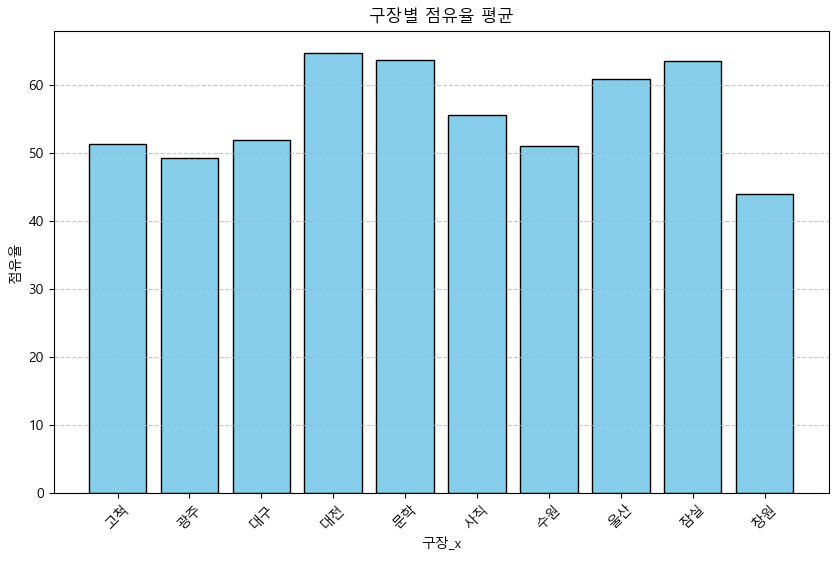

In [182]:
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
plt.bar(average_occupancy['구장_x'], average_occupancy['점유율'], color='skyblue', edgecolor='black')
plt.xlabel('구장_x')  # X축 레이블
plt.ylabel('점유율')  # Y축 레이블
plt.title('구장별 점유율 평균')  # 그래프 제목
plt.xticks(rotation=45)  # X축 레이블 회전 (긴 레이블을 보기 좋게 함)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에 그리드 추가

# 바 차트 출력
plt.show()

In [198]:
#  구장 점유율의 표준편차
std_dev = avg_occupancy_23['점유율'].std()

# 결과 출력
print(f"구장 관중 점유율의 표준편차: {std_dev}")

구장 관중 점유율의 표준편차: 7.20153619479682


In [199]:
# # 구장의 표준편차를 구하기

# stadium='잠실'
# filtered_df = avg_occupancy_23[avg_occupancy_23['구장_x'] == stadium]

# # '점유율' 열의 표준편차 계산
# std_dev = filtered_df['점유율'].std()

# # 결과 출력
# print(f"구장이 {stadium}일 때 점유율의 표준편차: {std_dev}")

구장이 잠실일 때 점유율의 표준편차: nan
